# Анализ отзывов (Quotes Scraping)

Сбор, очистка, анализ и визуализация данных. По шагам:

## 1. Сбор данных

In [21]:
!python ../scripts/parse_reviews.py

import pandas as pd
df = pd.read_csv('../data/reviews.csv')

df.head()

Saved 100 records to data/reviews.csv


,text,author,tag
0,“The world as we have created it is a process ...,Albert Einstein,change
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,abilities
2,“There are only two ways to live your life. On...,Albert Einstein,inspirational
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,aliteracy
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,be-yourself


## 2. Очистка и подготовка данных

In [20]:
# Переименуем столбцы для удобства
df.rename(columns={'text': 'quote', 'tag': 'tags'}, inplace=True)

# Приведем теги к строкам (если они разделены запятыми)
df['tags'] = df['tags'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Удалим пропущенные значения
df.dropna(inplace=True)

# Удалим дубликаты
df.drop_duplicates(inplace=True)

# Выведем информацию о DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quote   97 non-null     object
 1   author  97 non-null     object
 2   tags    97 non-null     object
dtypes: object(3)
memory usage: 3.0+ KB


## 3. Анализ и визуализация

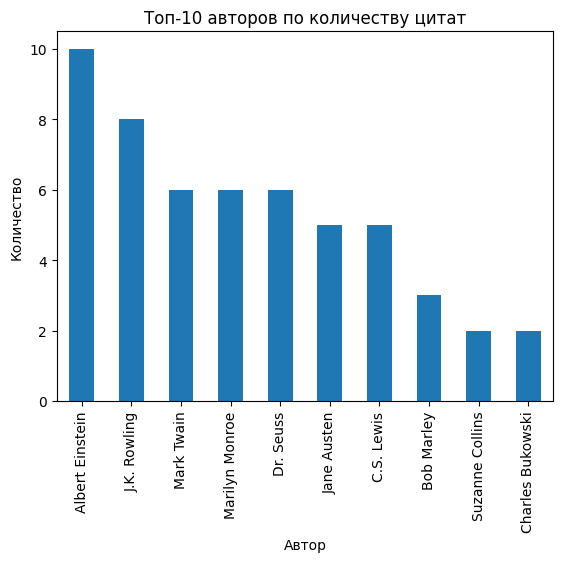

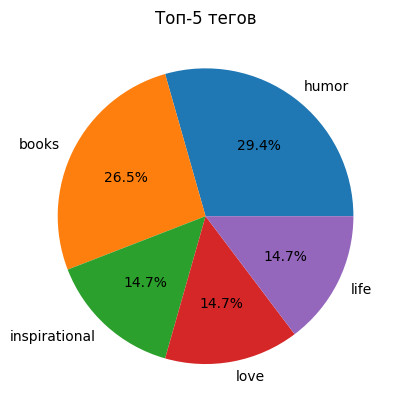

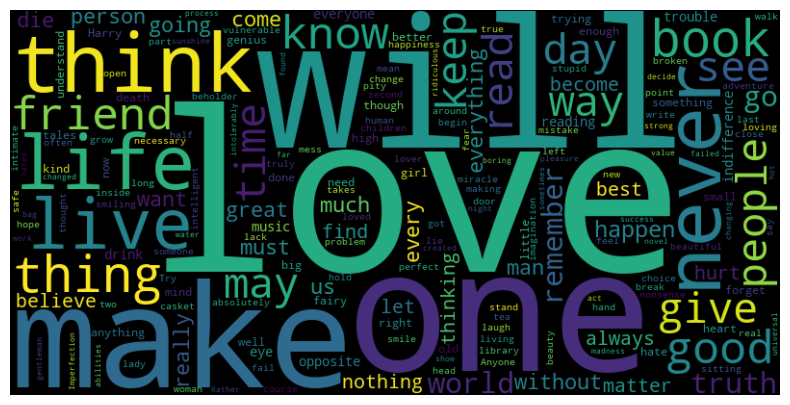

In [19]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Барплот: топ-10 авторов
top_authors = df['author'].value_counts().head(10)
top_authors.plot.bar()
plt.title('Топ-10 авторов по количеству цитат')
plt.xlabel('Автор')
plt.ylabel('Количество')
plt.show()

# Круговая диаграмма: топ-5 тегов
top_tags = df['tags'].value_counts().head(5)
top_tags.plot.pie(autopct='%1.1f%%')
plt.title('Топ-5 тегов')
plt.ylabel('')
plt.show()

# Облако слов по текстам цитат
text = ' '.join(df['quote'])
wc = WordCloud(width=800, height=400, collocations=False).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


## 4. Выводы

- Большинство цитат принадлежит авторам с высоким числом повторений.
- Теги показывают основные темы цитат.
- Словооблако выявляет ключевые слова по текстам.